In [1]:
import numpy as np
import pandas as pd

In [2]:
d = {'Age': ["<=30", "<=30", "31...40", ">40", ">40", ">40", "31...40", "<=30", "<=30", ">40", "<=30", "31...40", "31...40", ">40", "<=30", "<=30", "<=30", "31...40", ">40", "31...40"], 
     'Income': ["High", "High", "High", "Medium", "Low", "Low", "Low", "Medium", "Low", "Medium", "Medium", "Medium", "High", "Medium",  "Medium", "Low", "Low", "Low", "Medium", "High"], 
     'Student': ["No", "No", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No"], 
     'Credit_rating': ["Fair", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Excellent", "Excellent", "Fair", "Excellent", "Fair", "Excellent", "Excellent"],
     'Buys_computer': ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No", "No", "Yes", "Yes", "Yes"]}
df = pd.DataFrame(data=d)
df

,Age,Income,Student,Credit_rating,Buys_computer
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31...40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31...40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


In [3]:
# Buys_Computer: Yes/No
# No = 8, Yes = 12
A = np.array([12, 8])
pA = A / A.sum()
bc = -np.sum(pA*np.log2(pA))
bc

0.9709505944546686

In [4]:
# Age

#<=30
age1 = np.array([2, 6])
#31...40
age2 = np.array([6, 0])
#>40
age3 = np.array([4, 2])

p1 = age1 / age1.sum()
e1 = -np.sum(p1*np.log2(p1))

p2 = age2 / age2.sum()
e2 = -(1*np.log2(1))-0

p3 = age3 / age3.sum()
e3 = -np.sum(p3*np.log2(p3))

age = bc - (8/20*e1+6/20*e2+6/20*e3)
print("Gain (age): ", age)

Gain (age):  0.3709505944546686


In [5]:
# Income

#High
age1 = np.array([3, 2])
#Medium
age2 = np.array([5, 3])
#Low
age3 = np.array([4, 3])

p1 = age1 / age1.sum()
e1 = -np.sum(p1*np.log2(p1))

p2 = age2 / age2.sum()
e2 = -np.sum(p2*np.log2(p2))

p3 = age3 / age3.sum()
e3 = -np.sum(p3*np.log2(p3))

income = bc - (5/20*e1+8/20*e2+7/20*e3)
print("Gain (Income): ", income)

Gain (Income):  0.0016094970590274649


In [6]:
# Student

#Yes
stud1 = np.array([8, 1])
#No
stud2 = np.array([4, 7])

p1 = stud1 / stud1.sum()
e1 = -np.sum(p1*np.log2(p1))

p2 = stud2 / stud2.sum()
e2 = -np.sum(p2*np.log2(p2))

student = bc - (9/20*e1+11/20*e2)
print("Gain (student): ", student)

Gain (student):  0.22437117627527592


In [7]:
# credit_rating

#Fair
cred1 = np.array([7, 3])
#Excellent
cred2 = np.array([5, 5])

p1 = cred1 / cred1.sum()
e1 = -np.sum(p1*np.log2(p1))

p2 = cred2 / cred2.sum()
e2 = -np.sum(p2*np.log2(p2))

credit_rating = bc - (10/20*e1+10/20*e2)
print("Gain (credit_rating): ", credit_rating)

Gain (credit_rating):  0.03030514483932223


#### Größter Gain ist vom Attribut "Age" erhältlich
#### Danach kommt das Attribut "Student" 



In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
df['Age'] = df.Age.astype("category").cat.codes
df['Income'] = df.Income.astype("category").cat.codes
df['Student'] = df.Student.astype("category").cat.codes
df['Credit_rating'] = df.Credit_rating.astype("category").cat.codes
df['Buys_computer'] = df.Buys_computer.astype("category").cat.codes

df

,Age,Income,Student,Credit_rating,Buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1
9,2,2,1,1,1


In [11]:
X = df.drop(columns=['Buys_computer'])
y = df['Buys_computer']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    1
18    1
19    1
Name: Buys_computer, dtype: int8

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [13]:
 from sklearn.tree import export_graphviz
 
 export_graphviz(
         tree_clf,
         out_file="graph.dot",
         feature_names=['Age', 'Income', 'Student', 'Credit_rating'] ,
         class_names='Buys_computer',
         rounded=True,
         filled=True
 )

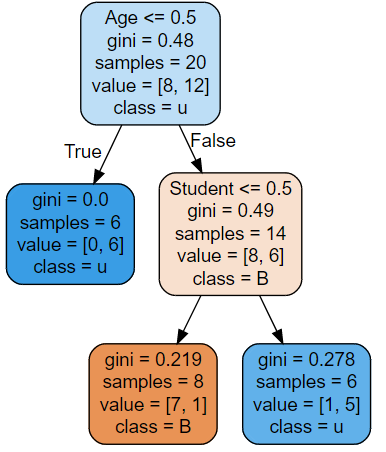

In [15]:
from IPython.display import Image
Image("Decision_tree.png", width=640, height=640)

#### Auch der Decision Tree von SciKit betrachtet das Attribut "Age" gefolgt vom Attribut "Student" als die Attribute mit dem größten Einfluss auf die Entscheidung. Im Vergleich zu dem Baum von SciKit ist der selbst erstellte Graph jedoch nicht binär und dementsprechend etwas anders aufgebaut. 